<a href="https://colab.research.google.com/github/vicsladk/IBMTest/blob/main/Impacto_da_Recess%C3%A3o_nas_Vendas_de_Autom%C3%B3veis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalando as bibliotecas

In [ ]:
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install folium

Importando as bibliotecas

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

Importando o Banco de Dados

In [ ]:
# Instalar a biblioteca requests se ainda não estiver instalada
!pip install requests

import requests # Importar a biblioteca requests
import io
import pandas as pd

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Usar requests para baixar o conteúdo da URL
try:
    response = requests.get(URL)
    response.raise_for_status() # Levantar um erro para códigos de status ruins (4xx ou 5xx)

    # Ler o conteúdo baixado diretamente em um DataFrame pandas usando io.BytesIO
    text = io.BytesIO(response.content)
    df = pd.read_csv(text)
    print('Data downloaded and read into a dataframe!')

except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

Data downloaded and read into a dataframe!


In [ ]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [ ]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

# **TAREFA 1.1**
Desenvolver um *gráfico de linhas* usando a funcionalidade do pandas para mostrar como as vendas de automóveis flutuam de ano para ano

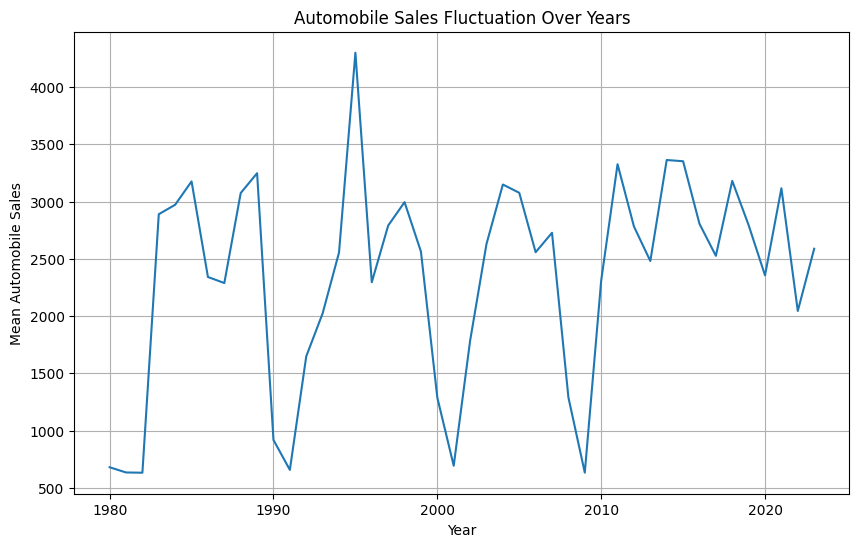

In [ ]:

df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

df_line.plot(kind='line', figsize=(10, 6))

plt.title('Automobile Sales Fluctuation Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Automobile Sales')
plt.grid(True)
plt.show()

Inclua o seguinte no gráfico: marque no eixo x todos os anos, para identificar os anos de recessão anotação para pelo menos dois anos de recessão Título como Vendas de Automóveis durante a Recessão.

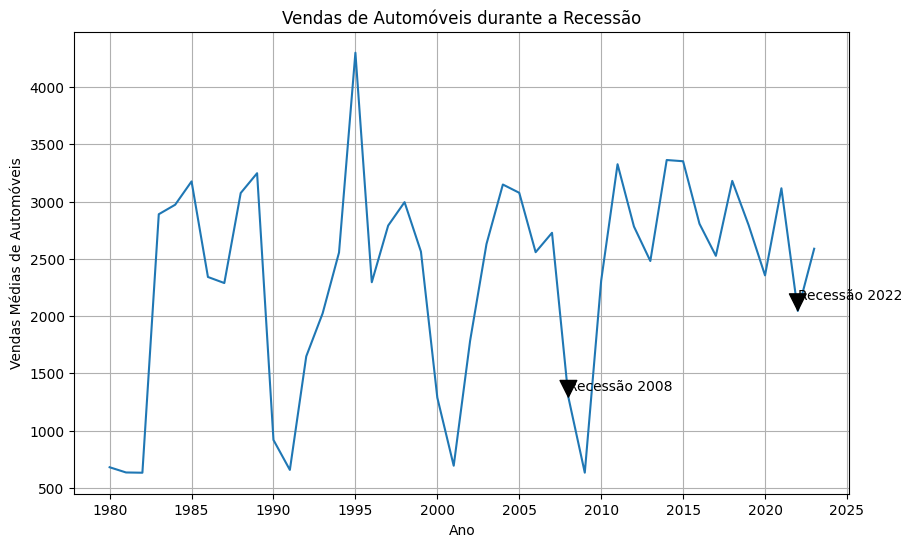

In [ ]:
df_line.plot(kind='line', figsize=(10, 6))

plt.title('Vendas de Automóveis durante a Recessão')
plt.xlabel('Ano')
plt.ylabel('Vendas Médias de Automóveis')
plt.xticks(df['Year'].unique()) # Marca todos os anos no eixo x
plt.grid(True)

recession_years = [2008, 2022] # Exemplos de anos de recessão

for year in recession_years:
    if year in df_line.index:
        plt.annotate(f'Recessão {year}',
                     xy=(year, df_line[year]), # Posição da anotação no gráfico
                     xytext=(year, df_line[year] * 1.05), # Posição do texto da anotação
                     arrowprops=dict(facecolor='black', shrink=0.05))

plt.xticks([1980, 1985, 1990, 1995, 2000, 2005,2010, 2015, 2020, 2025])

plt.show()

# **TAREFA 1.2:**
Traçar linhas diferentes para categorias de tipo de veículo e analisar a tendência para responder à pergunta “Há uma diferença notável nas tendências de vendas entre diferentes tipos de veículos durante períodos de recessão?”

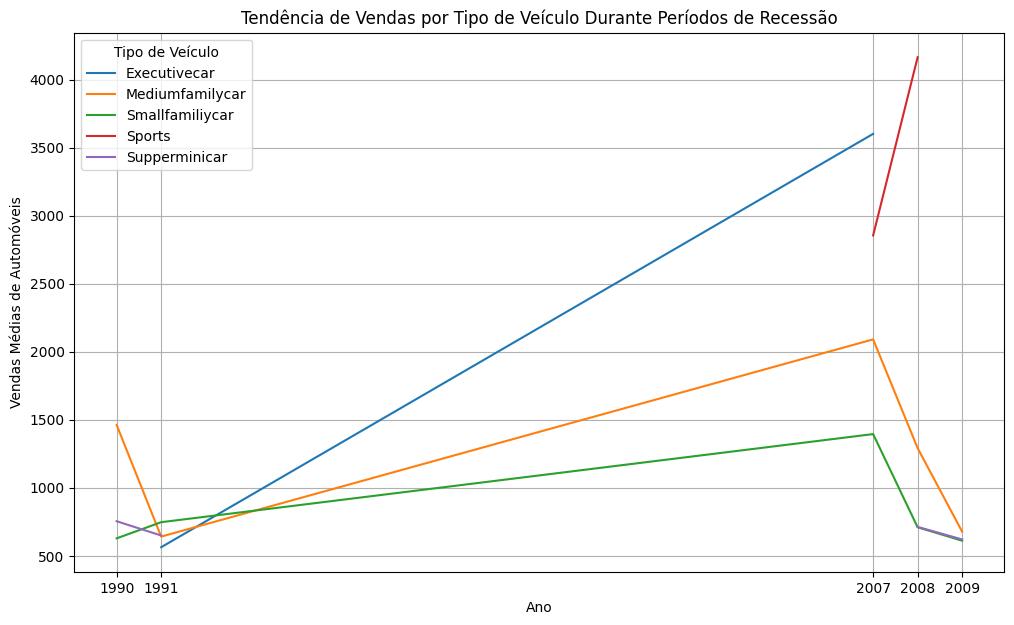

In [ ]:
# Filtrar dados para anos de recessão (ajuste os anos conforme necessário para sua análise)
recession_data = df[df['Year'].isin([1990, 1991, 2007, 2008, 2009, 20022])] # Exemplo de anos de recessão

# Agrupar por ano e tipo de veículo e calcular as vendas médias
sales_by_type_year = recession_data.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Pivotar os dados para que os tipos de veículos se tornem colunas para facilitar a plotagem
sales_pivot = sales_by_type_year.pivot(index='Year', columns='Vehicle_Type', values='Automobile_Sales')

# Traçar o gráfico de linhas
sales_pivot.plot(kind='line', figsize=(12, 7))

plt.title('Tendência de Vendas por Tipo de Veículo Durante Períodos de Recessão')
plt.xlabel('Ano')
plt.ylabel('Vendas Médias de Automóveis')
plt.xticks(sales_pivot.index) # Marca os anos de recessão no eixo x
plt.legend(title='Tipo de Veículo')
plt.grid(True)
plt.show()

# **TAREFA 1.3:**
Usar a funcionalidade da Biblioteca Seaborn para criar uma visualização que compare a tendência de vendas por tipo de veículo durante um período de recessão com um período sem recessão.

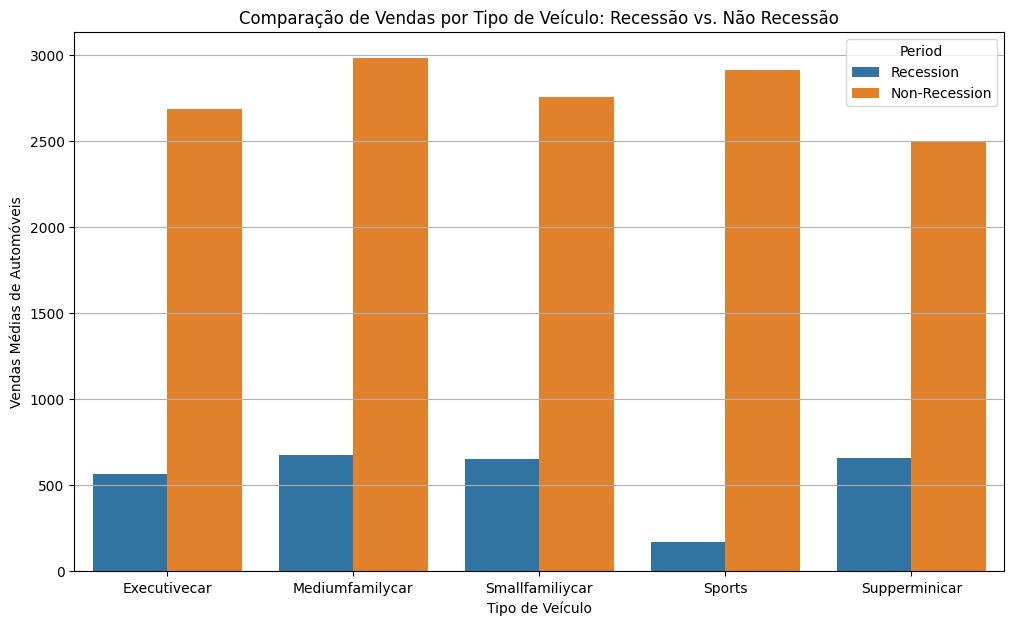

In [ ]:
# Filtrar os dados para períodos de recessão e não recessão
df_recession = df[df['Recession'] == 1]
df_non_recession = df[df['Recession'] == 0]

# Agrupar por tipo de veículo e calcular a média de vendas para cada período
sales_recession = df_recession.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
sales_non_recession = df_non_recession.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()

# Adicionar uma coluna para indicar o período (Recession ou Non-Recession)
sales_recession['Period'] = 'Recession'
sales_non_recession['Period'] = 'Non-Recession'

# Concatenar os dataframes para facilitar a plotagem
sales_combined = pd.concat([sales_recession, sales_non_recession])

# Criar o gráfico de barras usando Seaborn
plt.figure(figsize=(12, 7))
sns.barplot(x='Vehicle_Type', y='Automobile_Sales', hue='Period', data=sales_combined)

plt.title('Comparação de Vendas por Tipo de Veículo: Recessão vs. Não Recessão')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Vendas Médias de Automóveis')
plt.grid(axis='y')
plt.show()

# **TAREFA 1.4:**
Usar subplots para comparar as variações no PIB durante períodos de recessão e não recessão, desenvolvendo gráficos de linhas para cada período.

Trace um gráfico de duas linhas usando subplotagem para responder:

Como o PIB variou ao longo do tempo durante períodos de recessão e não recessão?

Use add_subplot() do Matplotlib para esta comparação.

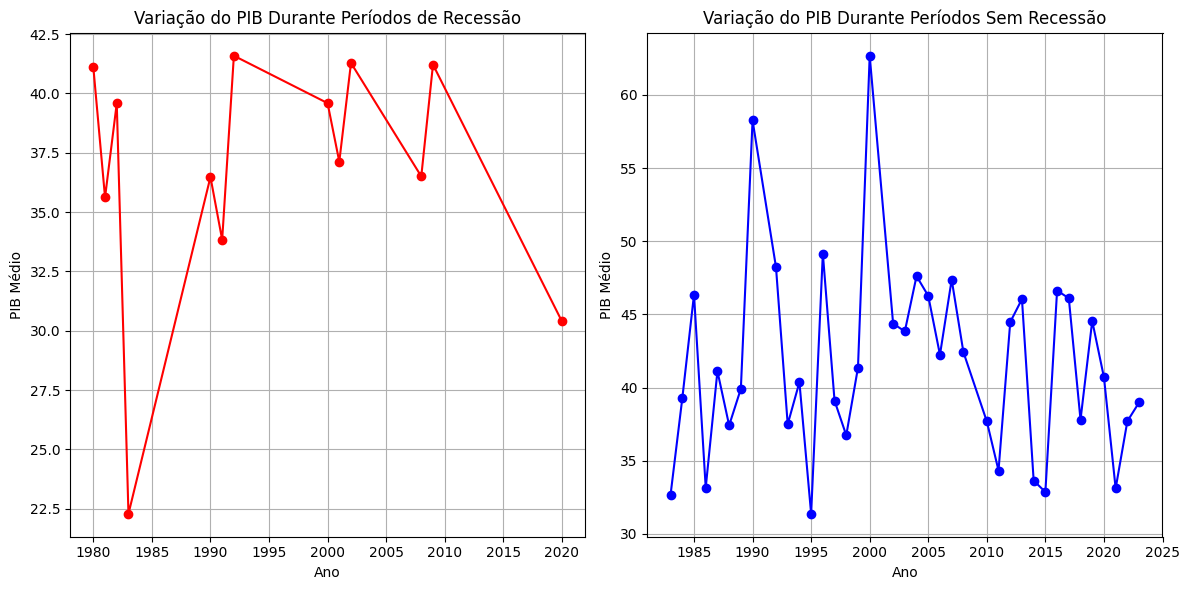

In [ ]:
# Filtrar dados para períodos de recessão e não recessão
df_recession = df[df['Recession'] == 1]
df_non_recession = df[df['Recession'] == 0]

# Agrupar por ano e calcular a média do PIB para cada período
gdp_recession = df_recession.groupby('Year')['GDP'].mean().reset_index()
gdp_non_recession = df_non_recession.groupby('Year')['GDP'].mean().reset_index()

# Criar a figura e os subplots
fig = plt.figure(figsize=(12, 6))

# Adicionar o primeiro subplot para o período de recessão
ax1 = fig.add_subplot(1, 2, 1) # 1 linha, 2 colunas, 1º subplot
ax1.plot(gdp_recession['Year'], gdp_recession['GDP'], marker='o', color='r')
ax1.set_title('Variação do PIB Durante Períodos de Recessão')
ax1.set_xlabel('Ano')
ax1.set_ylabel('PIB Médio')
ax1.grid(True)

# Adicionar o segundo subplot para o período sem recessão
ax2 = fig.add_subplot(1, 2, 2) # 1 linha, 2 colunas, 2º subplot
ax2.plot(gdp_non_recession['Year'], gdp_non_recession['GDP'], marker='o', color='b')
ax2.set_title('Variação do PIB Durante Períodos Sem Recessão')
ax2.set_xlabel('Ano')
ax2.set_ylabel('PIB Médio')
ax2.grid(True)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()

# **TAREFA 1.5:**
Desenvolver um gráfico de bolhas para exibir o impacto da sazonalidade nas vendas de automóveis.

Desenvolva um gráfico de bolhas para exibir as vendas de automóveis para cada mês e use o peso da sazonalidade para representar o tamanho de cada bolha.
Intitule este gráfico como "Impacto da sazonalidade nas vendas de automóveis".
Você pode criar um gráfico de bolhas chamando a função scatter().
Passe os valores "Mês" e "Vendas_de_Automóveis" para as funções x e y e, em seguida, use o peso da sazonalidade para o parâmetro de tamanho.

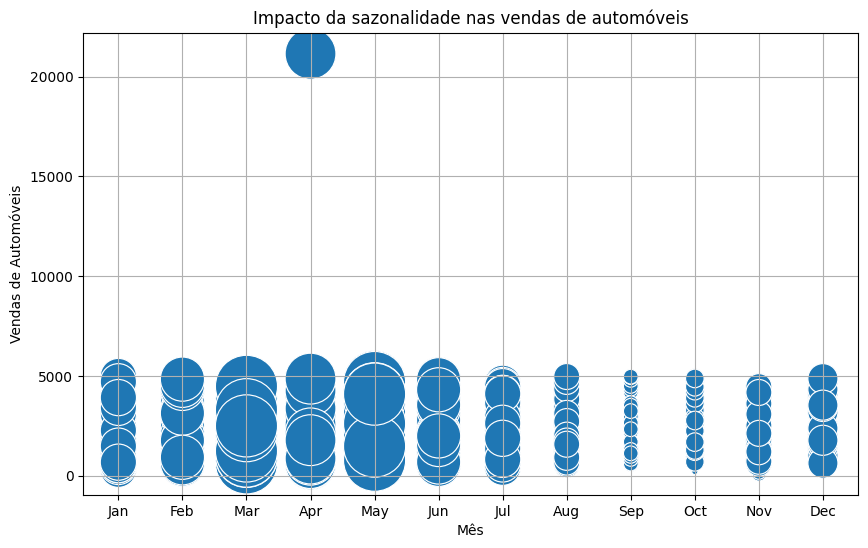

In [ ]:
# Crie o gráfico de bolhas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Month', y='Automobile_Sales', size='Seasonality_Weight', legend=False, sizes=(20, 2000))

plt.title('Impacto da sazonalidade nas vendas de automóveis')
plt.xlabel('Mês')
plt.ylabel('Vendas de Automóveis')
plt.grid(True)
plt.show()

# **TAREFA 1.6:**
Usar a funcionalidade do Matplotlib para desenvolver um gráfico de dispersão para identificar a correlação entre o preço médio do veículo em relação ao volume de vendas durante recessões.

Desenvolva um gráfico de dispersão para identificar se há correlação entre a confiança do consumidor e as vendas de automóveis durante períodos de recessão.
Intitule este gráfico como "Confiança do Consumidor e Vendas de Automóveis durante Recessões".
Crie um dataframe onde "recessão" seja "1".
Passe "Confiança_do_Consumidor" e "Vendas_de_Automóveis" para plt.scatter().
Trace outro gráfico de dispersão e intitule-o "Relação entre o Preço Médio de um Veículo e as Vendas durante Recessões".

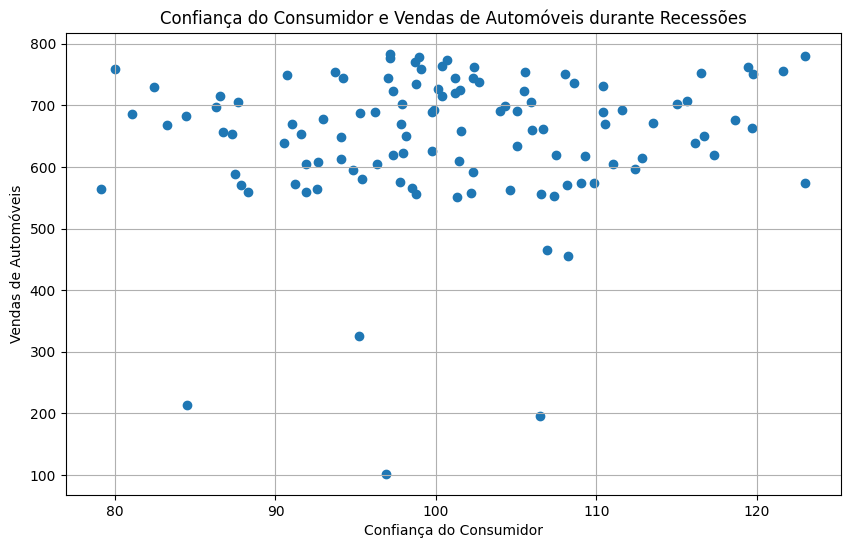

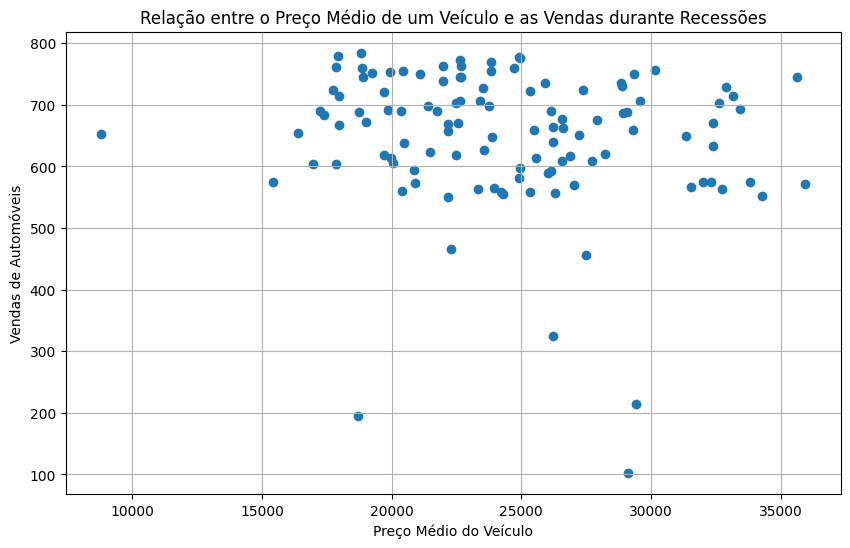

In [ ]:
# Crie um dataframe onde "recessão" seja "1".
df_recession = df[df['Recession'] == 1]

# Gráfico de dispersão: Confiança do Consumidor vs Vendas de Automóveis durante Recessões
plt.figure(figsize=(10, 6))
plt.scatter(df_recession['Consumer_Confidence'], df_recession['Automobile_Sales'])
plt.title('Confiança do Consumidor e Vendas de Automóveis durante Recessões')
plt.xlabel('Confiança do Consumidor')
plt.ylabel('Vendas de Automóveis')
plt.grid(True)
plt.show()

# Gráfico de dispersão: Preço Médio de um Veículo vs Vendas durante Recessões
plt.figure(figsize=(10, 6))
plt.scatter(df_recession['Price'], df_recession['Automobile_Sales'])
plt.title('Relação entre o Preço Médio de um Veículo e as Vendas durante Recessões')
plt.xlabel('Preço Médio do Veículo')
plt.ylabel('Vendas de Automóveis')
plt.grid(True)
plt.show()

# **TAREFA 1.7:**
Criar um gráfico de pizza para exibir a parte do gasto em publicidade da XYZAutomotives durante períodos de recessão e não recessão.

Crie dois dataframes para os períodos de recessão e não recessão.
Calcule a soma de Advertising_Expenditure para ambos os dataframes
Passe esses valores totais para plt.pie(). Pode incluir rótulos como ['Recessão', 'Não Recessão']
Intitule este gráfico como - Gastos com Publicidade durante os Períodos de Recessão e Não Recessão

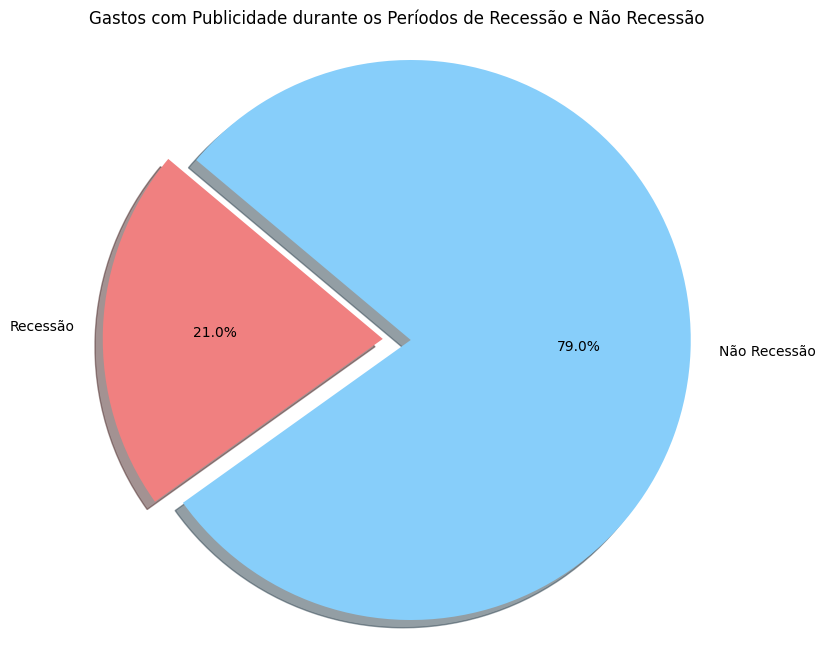

In [ ]:
# Crie dois dataframes para os períodos de recessão e não recessão.
df_recession = df[df['Recession'] == 1]
df_non_recession = df[df['Recession'] == 0]

# Calcule a soma de Advertising_Expenditure para ambos os dataframes
ad_expenditure_recession = df_recession['Advertising_Expenditure'].sum()
ad_expenditure_non_recession = df_non_recession['Advertising_Expenditure'].sum()

# Passe esses valores totais para plt.pie(). Pode incluir rótulos como ['Recessão', 'Não Recessão']
labels = ['Recessão', 'Não Recessão']
sizes = [ad_expenditure_recession, ad_expenditure_non_recession]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode a 1ª fatia (Recessão)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Intitule este gráfico como - Gastos com Publicidade durante os Períodos de Recessão e Não Recessão
plt.title('Gastos com Publicidade durante os Períodos de Recessão e Não Recessão')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# **TAREFA 1.8:**
Desenvolver um gráfico de pizza para exibir o total de gastos com publicidade para cada tipo de veículo durante o período de recessão.

Agrupe os tipos de veículos pela soma dos gastos com publicidade.
O gráfico forma uma pizza com os dados. Pode incluir rótulos relevantes.
Intitule este gráfico como - Participação de cada tipo de veículo no gasto total durante recessões.

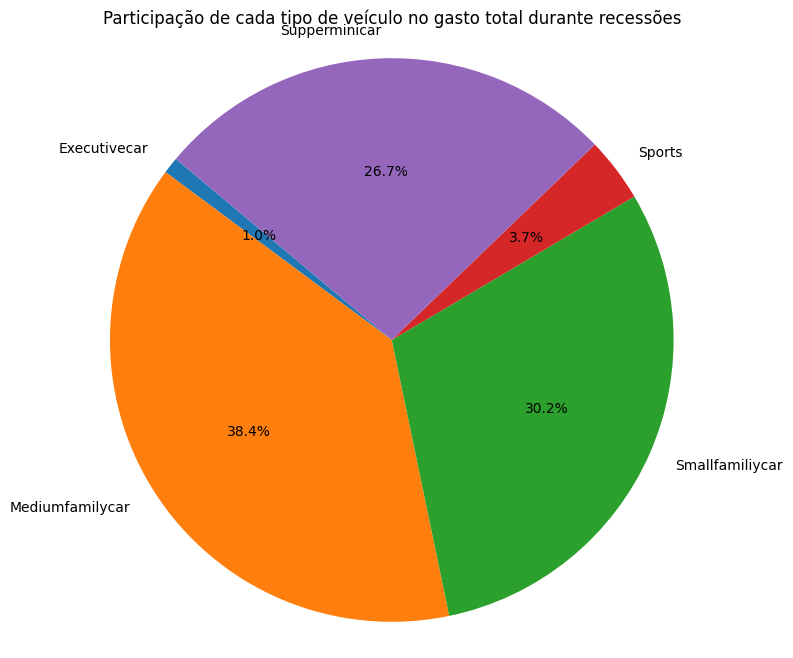

In [ ]:
# Filtrar dados para o período de recessão
df_recession = df[df['Recession'] == 1]

# Agrupar por tipo de veículo e calcular a soma dos gastos com publicidade
ad_expenditure_by_type = df_recession.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(ad_expenditure_by_type, labels=ad_expenditure_by_type.index, autopct='%1.1f%%', startangle=140)

# Intitular o gráfico
plt.title('Participação de cada tipo de veículo no gasto total durante recessões')

plt.axis('equal')  # Garante que a pizza seja desenhada como um círculo.
plt.show()

# **TAREFA 1.9:**
Desenvolver um gráfico de linhas para analisar o efeito da taxa de desemprego sobre o tipo de veículo e as vendas durante o Período de Recessão.

Você pode criar um gráfico de linhas e intitulá-lo "Efeito da taxa de desemprego sobre o tipo e as vendas de veículos".
Filtre os dados do período de recessão.
Utilize lineplot() do Seaborn e passe os dados relevantes.

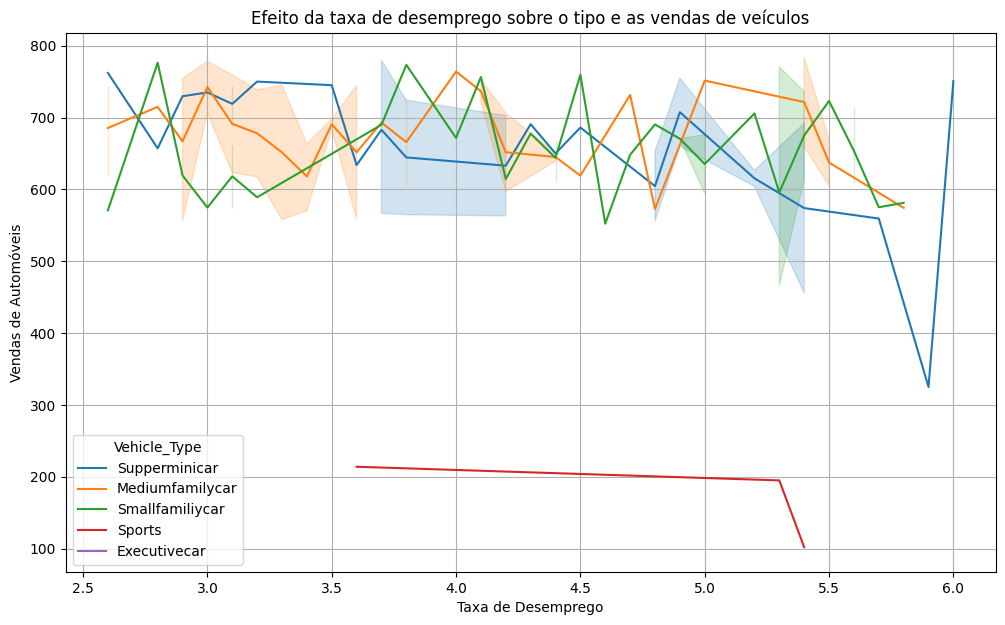

In [ ]:
# Filtrar os dados para o período de recessão
df_recession = df[df['Recession'] == 1]

# Criar o gráfico de linhas usando Seaborn
plt.figure(figsize=(12, 7))
try:
    sns.lineplot(data=df_recession, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type')

    # Intitular o gráfico
    plt.title('Efeito da taxa de desemprego sobre o tipo e as vendas de veículos')
    plt.xlabel('Taxa de Desemprego')
    plt.ylabel('Vendas de Automóveis')
    plt.grid(True)
    plt.show()
except ValueError as e:
    print(f"Erro: {e}")
    print("Por favor, verifique o nome correto da coluna para a taxa de desemprego no dataframe 'df_recession'.")
    print(f"Colunas disponíveis: {df_recession.columns.tolist()}")

# **Criar Painel usando Plotly e Dash**

In [ ]:
# Instalar as bibliotecas Plotly e Dash
%pip install plotly==5.19.0
%pip install dash==2.15.0

In [ ]:
from dash import Dash, dcc, html, Input, Output

In [ ]:
import plotly.express as px

In [ ]:
import dash
import more_itertools
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# Load the data using pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

In [ ]:
app = dash.Dash(__name__)

# **Tarefa  2.1**
Criar uma aplicação Dash e dar um título significativo

Alinhe o cabeçalho ao centro, defina a cor como #503D36 eo tamanho da fonte como 24.
Exemplo: style={‘textAlign’: ‘left’, ‘color’: ‘#000000’, ‘font-size’: 0}

In [ ]:
dropdown_options = [
    {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
]
# List of years
year_list = [i for i in range(1980, 2024, 1)]
#---------------------------------------------------------------------------------------
# Create the layout of the app
dropdown_options = [
    {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}]

# List of years
year_list = [i for i in range(1980, 2024, 1)]
#---------------------------------------------------------------------------------------
# Create the layout of the app
app.layout = html.Div([
    #TASK 2.1 Add title to the dashboard
    html.H1("Automobile Sales Statistics Dashboard",
            style={'textAlign': 'center', 'color': '#503D36', 'font-size': 24}), #Include style for title
])

In [ ]:
app.layout = html.Div([
    #TASK 2.1 Add title to the dashboard
    html.H1("Automobile Sales Statistics Dashboard",
            style={'textAlign': 'center', 'color': '#503D36', 'font-size': 24}), #Include style for title
])


In [ ]:
if __name__ == '__main__':
        app.run_server(debug=True, mode='inline')

<IPython.core.display.Javascript object>

# **TAREFA 2.2:**
Adicione menus suspensos ao seu painel com títulos e opções apropriadas

Crie um menu suspenso e adicione duas opções de Relatório a ele. Parâmetros a serem atualizados em dcc.Dropdown:

Defina o id como dropdown-statistics.

Defina as opções como uma lista contendo dicionários com rótulo e valores fornecidos pelo usuário para valor.

Parâmetros da Lista de Opções

1ª opção:

rótulo: Yearly Statistics
valor: Yearly Statistics

2ª opção:

rótulo: Recession Period Statistics
valor: Recession Period Statistics

Defina o placeholder como Select a report type.

Defina o valor como Select Statistics.

Defina o estilo para incluir largura de 80%, padding de 3px, tamanho da fonte de 20px e alinhamento do texto como centralizado.

In [ ]:
    html.Div([
        html.Label("Select Statistics:"),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=[{'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
                     {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}],
            value='Select Statistics',
            placeholder='Select a report type',
            style={'width': '80%', 'padding': '3px', 'font-size': '20px', 'textAlign': 'center'}
        )
    ]),
    html.Div(dcc.Dropdown(
            id='select-year',
            options=[{'label': i, 'value': i} for i in year_list],
            value='Select Year'
        ))

Div(Dropdown(options=[{'label': 1980, 'value': 1980}, {'label': 1981, 'value': 1981}, {'label': 1982, 'value': 1982}, {'label': 1983, 'value': 1983}, {'label': 1984, 'value': 1984}, {'label': 1985, 'value': 1985}, {'label': 1986, 'value': 1986}, {'label': 1987, 'value': 1987}, {'label': 1988, 'value': 1988}, {'label': 1989, 'value': 1989}, {'label': 1990, 'value': 1990}, {'label': 1991, 'value': 1991}, {'label': 1992, 'value': 1992}, {'label': 1993, 'value': 1993}, {'label': 1994, 'value': 1994}, {'label': 1995, 'value': 1995}, {'label': 1996, 'value': 1996}, {'label': 1997, 'value': 1997}, {'label': 1998, 'value': 1998}, {'label': 1999, 'value': 1999}, {'label': 2000, 'value': 2000}, {'label': 2001, 'value': 2001}, {'label': 2002, 'value': 2002}, {'label': 2003, 'value': 2003}, {'label': 2004, 'value': 2004}, {'label': 2005, 'value': 2005}, {'label': 2006, 'value': 2006}, {'label': 2007, 'value': 2007}, {'label': 2008, 'value': 2008}, {'label': 2009, 'value': 2009}, {'label': 2010, 'v

Crie um menu suspenso para selecionar as opções de ANO.


In [ ]:
app.layout = html.Div([
    #TASK 2.1 Add title to the dashboard
    html.H1("Automobile Sales Statistics Dashboard",
            style={'textAlign': 'center', 'color': '#503D36', 'font-size': 24}), #Include style for title

    #TASK 2.2: Add two dropdown menus
    html.Div([
        html.Label("Select Statistics:"),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=[{'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
                     {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}],
            value='Select Statistics',
            placeholder='Select a report type',
            style={'width': '80%', 'padding': '3px', 'font-size': '20px', 'textAlign': 'center'}
        )
    ]),
    html.Div(dcc.Dropdown(
            id='select-year',
            options=[{'label': i, 'value': i} for i in year_list],
            value='Select Year',
            placeholder='Select Year'
        )),
    #TASK 2.3: Add a division for output display
    html.Div(id='output-container', className='chart-grid', style={'display': 'flex'}),
])

In [ ]:
dcc.Dropdown(
        id='dropdown-statistics',
        options=[
            {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
            {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
        ],
        value='Select Statistics',
        placeholder='Select a report type',
        style={'width': '80%', 'padding': '3px', 'font-size': '20px', 'textAlign': 'center'}
    ),

(Dropdown(options=[{'label': 'Yearly Statistics', 'value': 'Yearly Statistics'}, {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}], value='Select Statistics', placeholder='Select a report type', style={'width': '80%', 'padding': '3px', 'font-size': '20px', 'textAlign': 'center'}, id='dropdown-statistics'),)

Adicione uma divisão interna para exibir a saída

html.Div([
    html.Div(id='........', className='.........., style={'display': 'flex'}),
])

Defina o id como output-container.
Defina className como chart-grid.
Defina o estilo para ser exibido como flex.
Nós passaremos os gráficos retornados pela função de callback para este output-container, referindo-nos ao nome da classe dele mais tarde.

In [ ]:
html.Div([
    html.Div(id='output-container', className='chart-grid', style={'display': 'flex'}),
])

Div([Div(id='output-container', className='chart-grid', style={'display': 'flex'})])

# **TAREFA 2.4:**
Criando Callbacks; Defina a função de callback para atualizar o contêiner de entrada com base nas estatísticas selecionadas e o contêiner de saída

*Definição do Callback:*

Os parâmetros da definição do Callback são os seguintes:
Saída: Especifica a saída do callback, que neste caso é a propriedade disabled do dropdown com o ID select-year.
Entrada: Especifica a entrada que aciona o callback, que é a propriedade value do dropdown com o ID dropdown-statistics.

*Função Callback:*

A função verifica o valor das estatísticas selecionadas. Se as estatísticas selecionadas forem Estatísticas Anuais, a função retorna False. Isso significa que a propriedade disabled do dropdown select-year será definida como False, habilitando o dropdown para que o usuário possa selecionar um ano.

Se as estatísticas selecionadas não forem Estatísticas Anuais (ou seja, forem Estatísticas do Período de Recessão), a função retorna True. Isso significa que a propriedade disabled do dropdown select-year será definida como True, desabilitando o dropdown, pois selecionar um ano não é relevante neste contexto.

*Atualizar função de callback do contêiner de saída*

Nosso layout possui 1 contêiner de saída, e seremos obrigados a retornar os gráficos desenvolvidos dcc.Graph() neste contêiner como divisões.
Para cada relatório, precisamos exibir quatro gráficos.

A função update_output_container nesta aplicação Dash gera e exibe dinamicamente gráficos com base na seleção do usuário nos menus suspensos. Especificamente, ela cria diferentes conjuntos de gráficos para Estatísticas do Período de Recessão e Estatísticas Anuais. Estaremos criando 4 gráficos para cada relatório.

**Definição do Callback**

Parâmetros:

Output: Isso especifica que a propriedade children do componente com o ID output-container será atualizada. No Dash, children geralmente se refere ao conteúdo dentro de um contêiner, como gráficos, texto ou outros elementos HTML.

Input:

Propriedade de Input para o tipo de relatório: Isso especifica que a propriedade value do menu suspenso com o ID dropdown-statistics (que permite ao usuário selecionar entre Estatísticas Anuais e Estatísticas do Período de Recessão) acionará o callback quando mudar.

Propriedade de input para seleção de ano: Isso especifica que a propriedade value do menu suspenso com o ID select-year (que permite ao usuário selecionar um ano específico) acionará o callback quando mudar.

In [ ]:
@app.callback(
    Output(component_id='select-year', component_property='disabled'),
    Input(component_id='dropdown-statistics', component_property='value'))
def update_input_container(selected_statistics):
    if selected_statistics == 'Yearly Statistics':
        return False
    else:
        return True

@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='dropdown-statistics', component_property='value'),
     Input(component_id='select-year', component_property='value')])
def update_output_container(selected_statistics, selected_year):
    if selected_statistics == 'Recession Period Statistics':
        recession_data = data[data['Recession'] == 1]

        # Plot 1: Automobile sales fluctuate over Recession Period (year wise) using line chart
        yearly_rec = recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        R_chart1 = dcc.Graph(
            figure=px.line(yearly_rec,
                x='Year',
                y='Automobile_Sales',
                title="Automobile Sales Fluctuation Over Recession Period (Year Wise)"))

        # Plot 2: Calculate the average number of vehicles sold by vehicle type and represent as a Bar chart
        average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        R_chart2  = dcc.Graph(
            figure=px.bar(average_sales,
            x='Vehicle_Type',
            y='Automobile_Sales',
            title="Average Number of Vehicles Sold by Vehicle Type During Recession"))

        # Plot 3 : Pie chart for total expenditure share by vehicle type during recessions
        exp_rec= recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        R_chart3 = dcc.Graph(
            figure=px.pie(exp_rec,
            values='Advertising_Expenditure',
            names='Vehicle_Type',
            title="Total expenditure share by vehicle type during recessions"
        ))

        # Plot 4: Effect of Unemployment Rate on Vehicle Type and Sales during Recession
        unemp_data = recession_data.groupby(['unemployment_rate', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
        R_chart4 = dcc.Graph(figure=px.bar(unemp_data,
                x='unemployment_rate',
                y='Automobile_Sales',
                color='Vehicle_Type',
                labels={'unemployment_rate': 'Unemployment Rate', 'Automobile_Sales': 'Average Automobile Sales'},
                title='Effect of Unemployment Rate on Vehicle Type and Sales'))

        return [
            html.Div(className='chart-item', children=[html.Div(children=R_chart1), html.Div(children=R_chart2)], style={'display': 'flex'}),
            html.Div(className='chart-item', children=[R_chart3, R_chart4], style={'display': 'flex'})
        ]

    elif selected_statistics == 'Yearly Statistics' and selected_year != 'Select Year':
        yearly_data = data[data['Year'] == selected_year]

        # (Você precisará criar e adicionar aqui os 4 gráficos para Yearly Statistics)
        # Por enquanto, deixarei como exemplo apenas um gráfico, como estava antes
        total_sales_year = yearly_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()
        yearly_chart1 = dcc.Graph(figure=px.bar(total_sales_year, x='Vehicle_Type', y='Automobile_Sales', title=f'Total Automobile Sales in {selected_year}'))

        # Exemplo de como adicionar mais gráficos para Yearly Statistics
        # yearly_chart2 = dcc.Graph(...)
        # yearly_chart3 = dcc.Graph(...)
        # yearly_chart4 = dcc.Graph(...)


        return [
            html.Div(className='chart-item', children=[html.Div(children=yearly_chart1)]),
            # Inclua os outros gráficos de Yearly Statistics aqui
            # html.Div(className='chart-item', children=[yearly_chart2, yearly_chart3], style={'display': 'flex'}),
            # html.Div(className='chart-item', children=[yearly_chart4], style={'display': 'flex'})
        ]
    else:
        return None

# **TAREFA 2.5:**
Criar e exibir gráficos para Estatísticas do Relatório de Recessão

In [ ]:
#Plot 1 Automobile sales fluctuate over Recession Period (year wise) using line chart

yearly_rec = recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
# Plotting the line graph
R_chart1 = dcc.Graph(
            figure=px.line(yearly_rec,
                x='Year',
                y='Automobile_Sales',
                title="Automobile Sales Fluctuation Over Recession Period (Year Wise)"))

In [ ]:
#Plot 2 Calculate the average number of vehicles sold by vehicle type and represent as a Bar chart

average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
R_chart2  = dcc.Graph(
            figure=px.bar(average_sales,
            x='Vehicle_Type',
            y='Automobile_Sales',
            title="Average Number of Vehicles Sold by Vehicle Type During Recession"))

In [ ]:
# Plot 3 : Pie chart for total expenditure share by vehicle type during recessions

exp_rec= recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
R_chart3 = dcc.Graph(
        figure=px.pie(exp_rec,
        values='Advertising_Expenditure',
        names='Vehicle_Type',
        title="Total expenditure share by vehicle type during recessions"
    )
)

In [ ]:
unemp_data = recession_data.groupby(['unemployment_rate', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

R_chart4 = dcc.Graph(figure=px.bar(unemp_data,
        x='unemployment_rate',
        y='Automobile_Sales',
        color='Vehicle_Type',
        labels={'unemployment_rate': 'Unemployment Rate', 'Automobile_Sales': 'Average Automobile Sales'},
        title='Effect of Unemployment Rate on Vehicle Type and Sales'))


layout = html.Div(children=[
    html.Div(className='chart-item', children=[html.Div(children=R_chart1), html.Div(children=R_chart2)], style={'display': 'flex'}),
    html.Div(className='chart-item', children=[R_chart3, R_chart4], style={'display': 'flex'})
])


# **TAREFA 2.6:**
Criar e exibir gráficos para Estatísticas do Relatório Anual

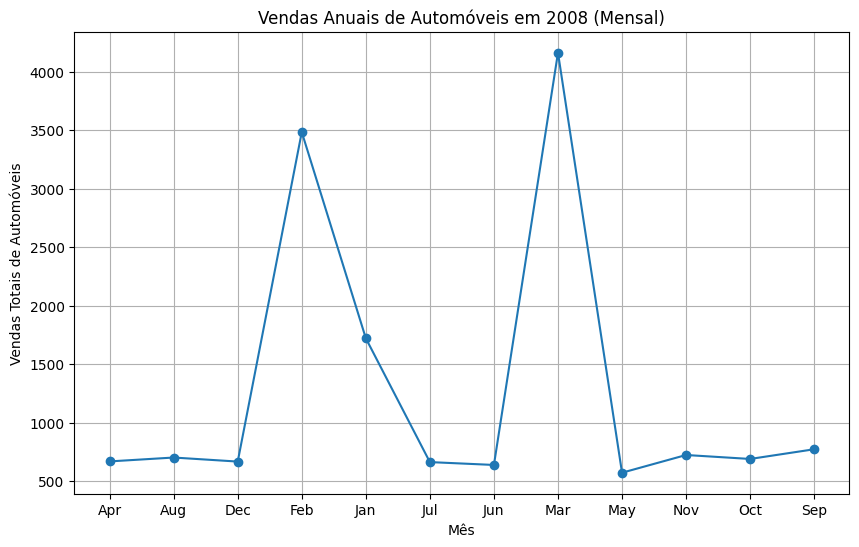

In [ ]:
# Filtrar dados para o ano de 2008
df_2008 = df[df['Year'] == 2008]

# Agrupar por mês e calcular a soma das vendas para 2008
sales_2008 = df_2008.groupby('Month')['Automobile_Sales'].sum().reset_index()

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(sales_2008['Month'], sales_2008['Automobile_Sales'], marker='o')

plt.title('Vendas Anuais de Automóveis em 2008 (Mensal)')
plt.xlabel('Mês')
plt.ylabel('Vendas Totais de Automóveis')
plt.xticks(sales_2008['Month']) # Marca todos os meses no eixo x
plt.grid(True)
plt.show()

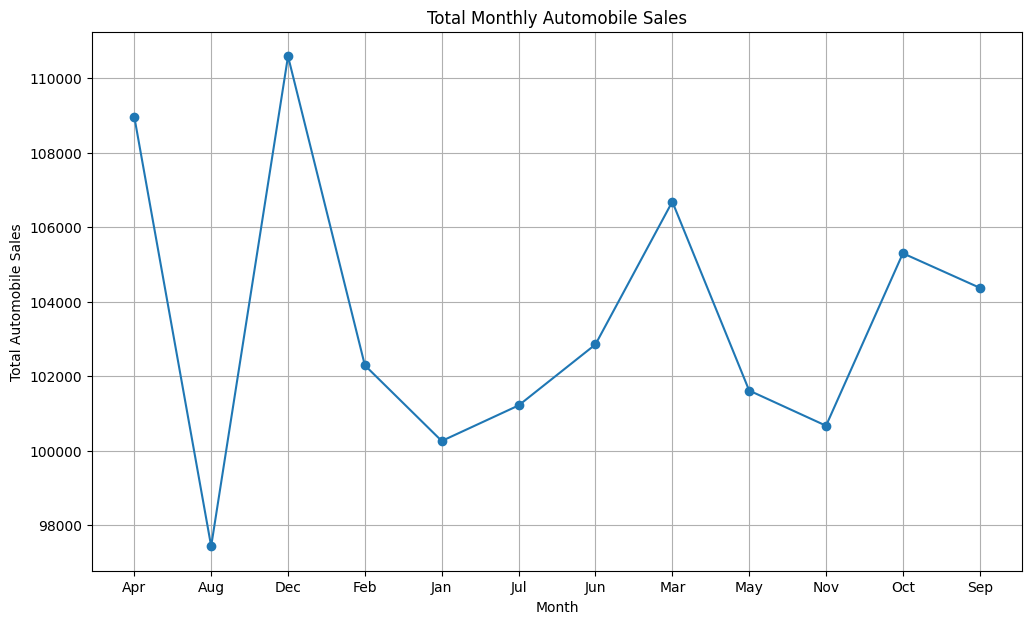

In [ ]:
# Agrupar por mês e calcular a soma das vendas para todos os anos
monthly_sales = df.groupby('Month')['Automobile_Sales'].sum().reset_index()

# Criar o gráfico de linhas
plt.figure(figsize=(12, 7))
plt.plot(monthly_sales['Month'], monthly_sales['Automobile_Sales'], marker='o')

plt.title('Total Monthly Automobile Sales')
plt.xlabel('Month')
plt.ylabel('Total Automobile Sales')
plt.xticks(monthly_sales['Month']) # Marca todos os meses no eixo x
plt.grid(True)
plt.show()

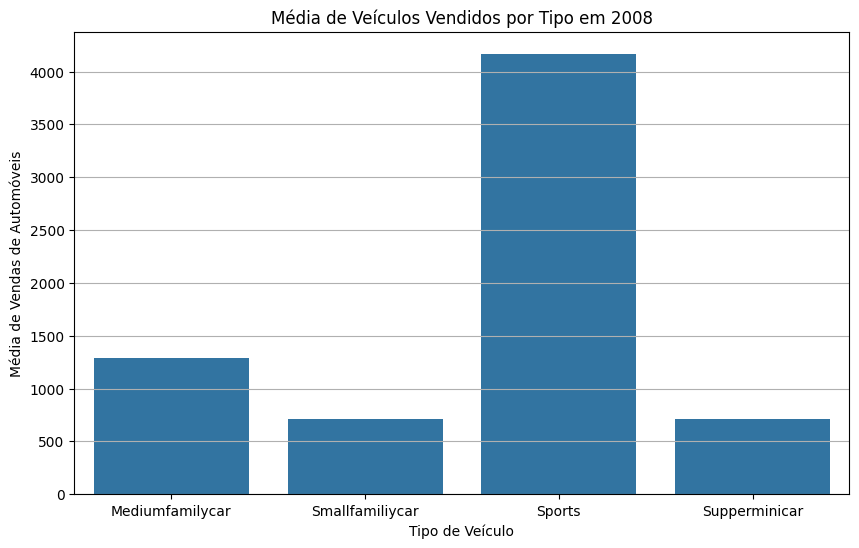

In [ ]:
# Filtrar dados para o ano de 2008
df_2008 = df[df['Year'] == 2008]

# Agrupar por tipo de veículo e calcular a média das vendas para 2008
average_sales_2008 = df_2008.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()

# Criar o gráfico de barras usando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle_Type', y='Automobile_Sales', data=average_sales_2008)

plt.title('Média de Veículos Vendidos por Tipo em 2008')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Média de Vendas de Automóveis')
plt.grid(axis='y')
plt.show()

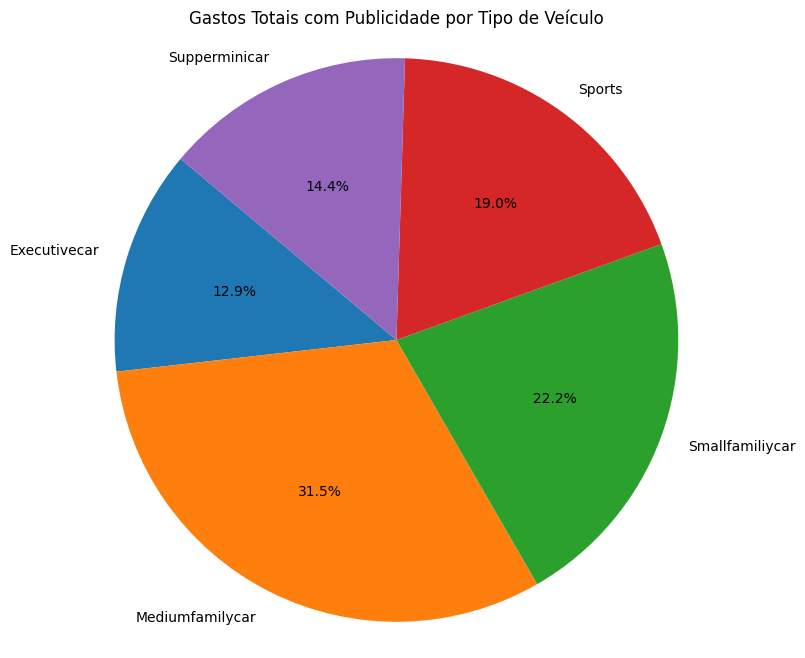

In [ ]:
# Agrupar por tipo de veículo e calcular a soma dos gastos com publicidade
ad_expenditure_by_type = df.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(ad_expenditure_by_type, labels=ad_expenditure_by_type.index, autopct='%1.1f%%', startangle=140)

# Intitular o gráfico
plt.title('Gastos Totais com Publicidade por Tipo de Veículo')

plt.axis('equal')  # Garante que a pizza seja desenhada como um círculo.
plt.show()

In [ ]:
!pip3.8 install setuptools
!python3.8 -m pip install packaging
!python3.8 -m pip install pandas dash
!pip install more-itertools

/bin/bash: line 1: pip3.8: command not found
/bin/bash: line 1: python3.8: command not found
/bin/bash: line 1: python3.8: command not found


In [ ]:
!python3.8 DV0101EN-Final-Assign-Part-2-Questions.py

/bin/bash: line 1: python3.8: command not found
